In [107]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA



In [93]:
df = pd.read_csv("gamesXY2007-2019.csv")

train_labels = df[df.season < 2015]["home_win"]
test_labels = df[df.season > 2014]["home_win"]

df_modeling = df[['h_avg_score_spread', 'h_n_games', 'h_avg_wins', 'h_avg_home_games',
       'h_avg_home_wins', 'h_avg_first_downs', 'h_avg_o_first_downs',
       'h_avg_third_down_complete', 'h_avg_o_third_down_complete',
       'h_avg_third_down_attempts', 'h_avg_o_third_down_attempts',
       'h_avg_total_yards', 'h_avg_o_total_yards', 'h_avg_passing_yards',
       'h_avg_o_passing_yards', 'h_avg_passing_complete',
       'h_avg_o_passing_complete', 'h_avg_passing_attempts',
       'h_avg_o_passing_attempts', 'h_avg_rushing_yards',
       'h_avg_o_rushing_yards', 'h_avg_rushing_attempts',
       'h_avg_o_rushing_attempts', 'h_avg_penalty_yards',
       'h_avg_o_penalty_yards', 'h_avg_turnovers', 'h_avg_o_turnovers',
       'h_avg_time_possession', 'h_avg_o_time_possession',
       'h_StrengthOfSchedule', 'v_avg_score_spread', 'v_n_games', 'v_avg_wins',
       'v_avg_home_games', 'v_avg_home_wins', 'v_avg_first_downs',
       'v_avg_o_first_downs', 'v_avg_third_down_complete',
       'v_avg_o_third_down_complete', 'v_avg_third_down_attempts',
       'v_avg_o_third_down_attempts', 'v_avg_total_yards',
       'v_avg_o_total_yards', 'v_avg_passing_yards', 'v_avg_o_passing_yards',
       'v_avg_passing_complete', 'v_avg_o_passing_complete',
       'v_avg_passing_attempts', 'v_avg_o_passing_attempts',
       'v_avg_rushing_yards', 'v_avg_o_rushing_yards',
       'v_avg_rushing_attempts', 'v_avg_o_rushing_attempts',
       'v_avg_penalty_yards', 'v_avg_o_penalty_yards', 'v_avg_turnovers',
       'v_avg_o_turnovers', 'v_avg_time_possession', 'v_avg_o_time_possession',
       'v_StrengthOfSchedule', 'game_id',
       'home_id', 'visitor_id', 'season', 'neutralSite']]

train_data = df_modeling[df_modeling.season < 2015]
test_data = df_modeling[df_modeling.season > 2014]




In [139]:
train_data.columns

Index(['h_avg_score_spread', 'h_n_games', 'h_avg_wins', 'h_avg_home_games',
       'h_avg_home_wins', 'h_avg_first_downs', 'h_avg_o_first_downs',
       'h_avg_third_down_complete', 'h_avg_o_third_down_complete',
       'h_avg_third_down_attempts', 'h_avg_o_third_down_attempts',
       'h_avg_total_yards', 'h_avg_o_total_yards', 'h_avg_passing_yards',
       'h_avg_o_passing_yards', 'h_avg_passing_complete',
       'h_avg_o_passing_complete', 'h_avg_passing_attempts',
       'h_avg_o_passing_attempts', 'h_avg_rushing_yards',
       'h_avg_o_rushing_yards', 'h_avg_rushing_attempts',
       'h_avg_o_rushing_attempts', 'h_avg_penalty_yards',
       'h_avg_o_penalty_yards', 'h_avg_turnovers', 'h_avg_o_turnovers',
       'h_avg_time_possession', 'h_avg_o_time_possession',
       'h_StrengthOfSchedule', 'v_avg_score_spread', 'v_n_games', 'v_avg_wins',
       'v_avg_home_games', 'v_avg_home_wins', 'v_avg_first_downs',
       'v_avg_o_first_downs', 'v_avg_third_down_complete',
       'v_avg_o_

In [94]:
scaler = MinMaxScaler()

scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.fit_transform(test_data)

### Naive Bayes model works with 66.6% accuracy

In [95]:
nb = BernoulliNB()
nb.fit(train_data, train_labels)
accuracy_nb = np.mean(nb.predict(test_data) == test_labels)

print("Unscaled")
print(classification_report(test_labels,nb.predict(test_data), digits = 4))

nb = BernoulliNB()
nb.fit(scaled_train_data, train_labels)
accuracy_nb = np.mean(nb.predict(scaled_test_data) == test_labels)

print("Scaled")
print(classification_report(test_labels,nb.predict(scaled_test_data), digits = 4))

Unscaled
              precision    recall  f1-score   support

           0     0.6653    0.4448    0.5331      1077
           1     0.6661    0.8319    0.7398      1434

    accuracy                         0.6659      2511
   macro avg     0.6657    0.6383    0.6365      2511
weighted avg     0.6658    0.6659    0.6512      2511

Scaled
              precision    recall  f1-score   support

           0     0.6205    0.2080    0.3115      1077
           1     0.6033    0.9045    0.7238      1434

    accuracy                         0.6057      2511
   macro avg     0.6119    0.5562    0.5177      2511
weighted avg     0.6107    0.6057    0.5470      2511



In [96]:
for a in [0.01, 0.1, 1, 5, 10, 50, 100]:
    nb = BernoulliNB(alpha = a)
    nb.fit(train_data, train_labels)
    accuracy_nb = np.mean(nb.predict(test_data) == test_labels)
    print(a, accuracy_nb)
# Best alpha seems to be 50

0.01 0.6658701712465154
0.1 0.6658701712465154
1 0.6658701712465154
5 0.6658701712465154
10 0.666268418956591
50 0.6690561529271206
100 0.6133014735165273


### Best Naive Bayes so far

In [97]:
best_nb = BernoulliNB(alpha = 50, fit_prior = True)
best_nb.fit(train_data, train_labels)
accuracy_best_nb = np.mean(best_nb.predict(test_data) == test_labels)
print(accuracy_best_nb)

0.6690561529271206


## SVM Models

In [98]:
max_acc = 0
optimal_c = 0
all_accuracies = []

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C = c, gamma = "auto")
    svm.fit(train_data, train_labels)
    accuracy_svm = np.mean(svm.predict(test_data) == test_labels)
    all_accuracies.append(accuracy_svm)

    #print(classification_report(test_labels,svm.predict(test_data), digits = 4))
    if accuracy_svm > max_acc:
        max_acc = accuracy_svm
        optimal_c = c
        
print("Unscaled")
print("Optimal C Value:", optimal_c)
print("Accuracy: ", max_acc)
print(all_accuracies)

max_acc = 0
optimal_c = 0
all_accuracies = []

for c in [0.001, 0.01, 0.1, 1 10, 100]:
    svm = SVC(C = c, gamma = "auto")
    svm.fit(scaled_train_data, train_labels)
    accuracy_svm = np.mean(svm.predict(scaled_test_data) == test_labels)
    all_accuracies.append(accuracy_svm)

    #print(classification_report(test_labels,svm.predict(test_data), digits = 4))
    if accuracy_svm > max_acc:
        max_acc = accuracy_svm
        optimal_c = c
        
print("\nScaled")
print("Optimal C Value:", optimal_c)
print("Accuracy: ", max_acc)
print(all_accuracies)

SyntaxError: invalid syntax (<ipython-input-98-4e80797185f4>, line 25)

In [99]:
#unscaled is just worse across the board for SVM

'''max_acc = 0
optimal_c = 0
all_accuracies = []
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C = c, gamma = "scale")
    svm.fit(train_data, train_labels)
    accuracy_svm = np.mean(svm.predict(test_data) == test_labels)
    all_accuracies.append(accuracy_svm)

    #print(classification_report(test_labels,svm.predict(test_data), digits = 4))
    if accuracy_svm > max_acc:
        max_acc = accuracy_svm
        optimal_c = c
    
print("Unscaled")
print("Optimal C Value:", optimal_c)
print("Accuracy: ", max_acc)
print(all_accuracies)'''

max_acc = 0
optimal_c = 0
all_accuracies = []

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C = c, gamma = "scale")
    svm.fit(scaled_train_data, train_labels)
    accuracy_svm = np.mean(svm.predict(scaled_test_data) == test_labels)
    all_accuracies.append(accuracy_svm)

    #print(classification_report(test_labels,svm.predict(test_data), digits = 4))
    if accuracy_svm > max_acc:
        max_acc = accuracy_svm
        optimal_c = c
        
print("\nScaled")
print("Optimal C Value:", optimal_c)
print("Accuracy: ", max_acc)
print(all_accuracies)



Scaled
Optimal C Value: 1
Accuracy:  0.6977299880525687
[0.5710872162485066, 0.5890083632019116, 0.694942254082039, 0.6977299880525687, 0.6730386300278773, 0.6559139784946236]


In [100]:
max_acc = 0
optimal_c = 0
all_accuracies = []

for c in [0.6, 0.7, 0.8, 0.9, 1, 2, 3]:
    svm = SVC(C = c, gamma = "auto")
    svm.fit(scaled_train_data, train_labels)
    accuracy_svm = np.mean(svm.predict(scaled_test_data) == test_labels)
    all_accuracies.append(accuracy_svm)

    #print(classification_report(test_labels,svm.predict(test_data), digits = 4))
    if accuracy_svm > max_acc:
        max_acc = accuracy_svm
        optimal_c = c
        
print("\nScaled")
print("Optimal C Value:", optimal_c)
print("Accuracy: ", max_acc)
print(all_accuracies)


Scaled
Optimal C Value: 0.8
Accuracy:  0.7076861808044603
[0.7025089605734767, 0.7041019514137794, 0.7076861808044603, 0.7052966945440063, 0.7045001991238551, 0.7064914376742334, 0.7068896853843091]


### Best SVM so far

In [101]:
best_svm = SVC(C = 0.8, gamma = "auto")
best_svm.fit(scaled_train_data, train_labels)
accuracy_best_svm = np.mean(best_svm.predict(scaled_test_data) == test_labels)
print(accuracy_best_svm)
print(classification_report(test_labels,best_svm.predict(scaled_test_data), digits = 4))

0.7076861808044603
              precision    recall  f1-score   support

           0     0.6974    0.5627    0.6228      1077
           1     0.7132    0.8166    0.7614      1434

    accuracy                         0.7077      2511
   macro avg     0.7053    0.6896    0.6921      2511
weighted avg     0.7064    0.7077    0.7019      2511



## Logistic Regression

In [102]:
#worse
'''log_reg = LogisticRegression()
log_reg.fit(train_data, train_labels)
accuracy_log_reg = np.mean(log_reg.predict(test_data) == test_labels)
print(accuracy_log_reg)
print(classification_report(test_labels,log_reg.predict(test_data), digits = 4))'''

# L1 vs L2 

log_reg = LogisticRegression("l1")
log_reg.fit(scaled_train_data, train_labels)
accuracy_log_reg = np.mean(log_reg.predict(scaled_test_data) == test_labels)
print("L1")
print(classification_report(test_labels,log_reg.predict(scaled_test_data), digits = 4))

log_reg = LogisticRegression("l2")
log_reg.fit(scaled_train_data, train_labels)
accuracy_log_reg = np.mean(log_reg.predict(scaled_test_data) == test_labels)
print("\nL2")
print(classification_report(test_labels,log_reg.predict(scaled_test_data), digits = 4))

/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


L1
              precision    recall  f1-score   support

           0     0.8000    0.3491    0.4861      1077
           1     0.6565    0.9344    0.7712      1434

    accuracy                         0.6834      2511
   macro avg     0.7283    0.6418    0.6287      2511
weighted avg     0.7181    0.6834    0.6489      2511


L2
              precision    recall  f1-score   support

           0     0.7429    0.4345    0.5483      1077
           1     0.6762    0.8870    0.7674      1434

    accuracy                         0.6930      2511
   macro avg     0.7095    0.6608    0.6579      2511
weighted avg     0.7048    0.6930    0.6735      2511



/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
for c in [0.005, 0.1, 0.5, 1]:
    log_reg = LogisticRegression("l2", C = c)
    log_reg.fit(scaled_train_data, train_labels)
    accuracy_log_reg = np.mean(log_reg.predict(scaled_test_data) == test_labels)
    print("L2, C = ", c)
    print(classification_report(test_labels,log_reg.predict(scaled_test_data), digits = 4))
  

/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


L2, C =  0.005
              precision    recall  f1-score   support

           0     0.6961    0.4763    0.5656      1077
           1     0.6821    0.8438    0.7544      1434

    accuracy                         0.6862      2511
   macro avg     0.6891    0.6601    0.6600      2511
weighted avg     0.6881    0.6862    0.6734      2511

L2, C =  0.1
              precision    recall  f1-score   support

           0     0.6947    0.5682    0.6251      1077
           1     0.7147    0.8124    0.7604      1434

    accuracy                         0.7077      2511
   macro avg     0.7047    0.6903    0.6928      2511
weighted avg     0.7061    0.7077    0.7024      2511

L2, C =  0.5
              precision    recall  f1-score   support

           0     0.7213    0.4903    0.5837      1077
           1     0.6914    0.8577    0.7656      1434

    accuracy                         0.7001      2511
   macro avg     0.7064    0.6740    0.6747      2511
weighted avg     0.7042    0.7001

### Best Logistic Regression so far

In [104]:
best_log_reg = LogisticRegression("l2", C = 0.1)
best_log_reg.fit(scaled_train_data, train_labels)
accuracy_best_log_reg = np.mean(best_log_reg.predict(scaled_test_data) == test_labels)
accuracy_best_log_reg

/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7076861808044603

## Ensemble Prediction

In [105]:
sum_predictions = best_svm.predict(scaled_test_data) + best_log_reg.predict(scaled_test_data) + best_nb.predict(test_data)
prediction_voted = sum_predictions > 1.5
combined_accuracy = np.mean(prediction_voted == test_labels)
combined_accuracy

0.7084826762246117

## PCA

updated with optimal values from below

In [137]:
pca = PCA(n_components=25, whiten=True)
pca_train = pca.fit_transform(scaled_train_data)
pca_test = pca.transform(scaled_test_data)

log_reg_pca = LogisticRegression("l2", C = 0.1)
log_reg_pca.fit(pca_train, train_labels)
accuracy_log_reg_pca = np.mean(log_reg_pca.predict(pca_test) == test_labels)
print("Logisitic Regression. L2, C = ", 0.1)
print(accuracy_log_reg_pca)
print(classification_report(test_labels,log_reg_pca.predict(pca_test), digits = 4))

svm_pca = SVC(C = 0.6, gamma = "auto")
svm_pca.fit(pca_train, train_labels)
accuracy_svm_pca = np.mean(svm_pca.predict(pca_test) == test_labels)
print("SVM. c = 0.8")
print(accuracy_svm_pca)
print(classification_report(test_labels,svm_pca.predict(pca_test), digits = 4))

nb_pca = BernoulliNB(alpha = 50, fit_prior = True)
nb_pca.fit(pca_train, train_labels)
accuracy_nb_pca = np.mean(nb_pca.predict(pca_test) == test_labels)
print("Bernoulli NB. alpha = 50")
print(accuracy_nb_pca)
print(classification_report(test_labels,nb_pca.predict(pca_test), digits = 4))

sum_predictions_pca = svm_pca.predict(pca_test) + log_reg_pca.predict(pca_test) + nb_pca.predict(pca_test)
prediction_voted_pca = sum_predictions_pca > 1.5
combined_accuracy_pca = np.mean(prediction_voted_pca == test_labels)
print("PCA ensemble:",combined_accuracy_pca)

/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logisitic Regression. L2, C =  0.1
0.6969334926324173
              precision    recall  f1-score   support

           0     0.6653    0.5905    0.6257      1077
           1     0.7164    0.7768    0.7454      1434

    accuracy                         0.6969      2511
   macro avg     0.6908    0.6837    0.6855      2511
weighted avg     0.6945    0.6969    0.6940      2511

SVM. c = 0.8
0.688968538430904
              precision    recall  f1-score   support

           0     0.6800    0.5190    0.5887      1077
           1     0.6933    0.8166    0.7499      1434

    accuracy                         0.6890      2511
   macro avg     0.6867    0.6678    0.6693      2511
weighted avg     0.6876    0.6890    0.6808      2511

Bernoulli NB. alpha = 50
0.6814018319394664
              precision    recall  f1-score   support

           0     0.6325    0.6137    0.6230      1077
           1     0.7162    0.7322    0.7241      1434

    accuracy                         0.6814      2511

### PCA Bernoulli NB

In [125]:
for a in [0.01, 0.1, 1, 5, 10, 50, 100, 1000]:
    nb = BernoulliNB(alpha = a)
    nb.fit(pca_train, train_labels)
    accuracy_nb = np.mean(nb.predict(pca_test) == test_labels)
    print(a, accuracy_nb)

0.01 0.6802070888092393
0.1 0.6802070888092393
1 0.680605336519315
5 0.680605336519315
10 0.6802070888092393
50 0.680605336519315
100 0.680605336519315
1000 0.678215850258861


### PCA Logistic Regression

In [126]:
log_reg = LogisticRegression("l1")
log_reg.fit(pca_train, train_labels)
accuracy_log_reg = np.mean(log_reg.predict(pca_test) == test_labels)
print("L1")
print(classification_report(test_labels,log_reg.predict(pca_test), digits = 4))

log_reg = LogisticRegression("l2")
log_reg.fit(pca_train, train_labels)
accuracy_log_reg = np.mean(log_reg.predict(pca_test) == test_labels)
print("\nL2")
print(classification_report(test_labels,log_reg.predict(pca_test), digits = 4))

# very similar. L2 appears slightly better I guess

L1
              precision    recall  f1-score   support

           0     0.6636    0.5989    0.6296      1077
           1     0.7193    0.7720    0.7447      1434

    accuracy                         0.6977      2511
   macro avg     0.6914    0.6854    0.6871      2511
weighted avg     0.6954    0.6977    0.6953      2511


L2
              precision    recall  f1-score   support

           0     0.6643    0.6007    0.6309      1077
           1     0.7202    0.7720    0.7452      1434

    accuracy                         0.6985      2511
   macro avg     0.6923    0.6864    0.6881      2511
weighted avg     0.6962    0.6985    0.6962      2511



/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
for c in [0.005, 0.1, 0.5, 1, 10, 1000]:
    log_reg = LogisticRegression("l1", C = c)
    log_reg.fit(pca_train, train_labels)
    accuracy_log_reg = np.mean(log_reg.predict(pca_test) == test_labels)
    print("L2, C = ", c, accuracy_log_reg)
    #print(classification_report(test_labels,log_reg.predict(pca_test), digits = 4))
    
#0.1 still seems to be the best

L2, C =  0.005 0.678215850258861
L2, C =  0.1 0.7001194743130227
L2, C =  0.5 0.6981282357626444
L2, C =  1 0.6977299880525687
L2, C =  10 0.6981282357626444
L2, C =  1000 0.6985264834727201


/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

### SVM

In [134]:
max_acc = 0
optimal_c = 0
all_accuracies = []

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C = c, gamma = "auto")
    svm.fit(pca_train, train_labels)
    accuracy_svm = np.mean(svm.predict(pca_test) == test_labels)
    all_accuracies.append(accuracy_svm)

    #print(classification_report(test_labels,svm.predict(test_data), digits = 4))
    if accuracy_svm > max_acc:
        max_acc = accuracy_svm
        optimal_c = c
        
print("\nScaled")
print("Optimal C Value:", optimal_c)
print("Accuracy: ", max_acc)
print(all_accuracies)


Scaled
Optimal C Value: 0.1
Accuracy:  0.6833930704898447
[0.5710872162485066, 0.5710872162485066, 0.6833930704898447, 0.675826363998407, 0.6296296296296297, 0.6232576662684189]


In [136]:
max_acc = 0
optimal_c = 0
all_accuracies = []

for c in [0.6, 0.7, 0.8, 0.9, 1, 2, 3]:
    svm = SVC(C = c, gamma = "auto")
    svm.fit(pca_train, train_labels)
    accuracy_svm = np.mean(svm.predict(pca_test) == test_labels)
    all_accuracies.append(accuracy_svm)

    #print(classification_report(test_labels,svm.predict(test_data), digits = 4))
    if accuracy_svm > max_acc:
        max_acc = accuracy_svm
        optimal_c = c
        
print("\nScaled")
print("Optimal C Value:", optimal_c)
print("Accuracy: ", max_acc)
print(all_accuracies)

# 0.6 is now the best c value. marginal change



Scaled
Optimal C Value: 0.6
Accuracy:  0.6885702907208283
[0.6885702907208283, 0.6861808044603743, 0.681800079649542, 0.6810035842293907, 0.675826363998407, 0.672242134607726, 0.665073675826364]


### OVERALL

In [144]:
accuracies = [accuracy_best_log_reg,
accuracy_log_reg_pca,
accuracy_best_svm,
accuracy_svm_pca,
accuracy_best_nb,
accuracy_nb_pca]

names = ["Logistic Regression", "Logistic Regression PCA", "SVM", "SVM PCA", "Bernoulli Naive Bayes", "Bernoulli Naive Bayes PCA"]

for i in range(len(accuracies)):
    print(names[i], round(accuracies[i], 4))

Logistic Regression 0.7077
Logistic Regression PCA 0.6969
SVM 0.7077
SVM PCA 0.689
Bernoulli Naive Bayes 0.679
Bernoulli Naive Bayes PCA 0.6814


Text(0.5, 1.0, 'Accuracies for various models')

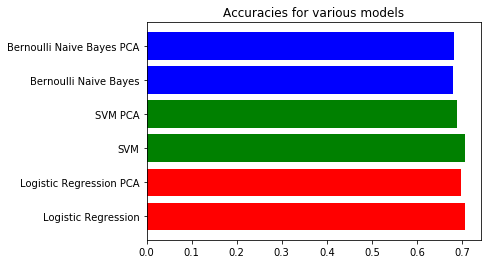

In [150]:
colors = ["red","red","green","green","blue","blue"]

plt.barh(names, accuracies, color = colors)
plt.title("Accuracies for various models")

## Best Models

These are the best models I was able to generate, whose accuracies are displayed in the table above. For all three there is a version trained on PCA data and a version trained on normal data. PCA performed marginally better for Bernoulli Naive Bayes and worse for SVM and Logistic Regression.

In [152]:
best_log_reg = LogisticRegression("l2", C = 0.1)
best_log_reg.fit(scaled_train_data, train_labels)
accuracy_best_log_reg = np.mean(best_log_reg.predict(scaled_test_data) == test_labels)
print("Logisitic Regression. L2, C = ", 0.1)
print(round(accuracy_best_log_reg,4))

log_reg_pca = LogisticRegression("l2", C = 0.1)
log_reg_pca.fit(pca_train, train_labels)
accuracy_log_reg_pca = np.mean(log_reg_pca.predict(pca_test) == test_labels)
print("Logisitic Regression with PCA. L2, C = ", 0.1)
print(round(accuracy_log_reg_pca, 4))
#print(classification_report(test_labels,log_reg_pca.predict(pca_test), digits = 4))

best_svm = SVC(C = 0.8, gamma = "auto")
best_svm.fit(scaled_train_data, train_labels)
accuracy_best_svm = np.mean(best_svm.predict(scaled_test_data) == test_labels)
print("SVM. c = 0.8")
print(round(accuracy_best_svm, 4))
#print(classification_report(test_labels,best_svm.predict(scaled_test_data), digits = 4))

svm_pca = SVC(C = 0.6, gamma = "auto")
svm_pca.fit(pca_train, train_labels)
accuracy_svm_pca = np.mean(svm_pca.predict(pca_test) == test_labels)
print("SVM with PCA. c = 0.6")
print(round(accuracy_svm_pca, 4))
#print(classification_report(test_labels,svm_pca.predict(pca_test), digits = 4))

best_nb = BernoulliNB(alpha = 50, fit_prior = True)
best_nb.fit(train_data, train_labels)
accuracy_best_nb = np.mean(best_nb.predict(test_data) == test_labels)
print("Bernoulli NB. alpha = 50")
print(round(accuracy_best_nb, 4))

nb_pca = BernoulliNB(alpha = 50, fit_prior = True)
nb_pca.fit(pca_train, train_labels)
accuracy_nb_pca = np.mean(nb_pca.predict(pca_test) == test_labels)
print("Bernoulli NB with PCA. alpha = 50")
print(round(accuracy_nb_pca, 4))
#print(classification_report(test_labels,nb_pca.predict(pca_test), digits = 4))

/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/henrybazakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logisitic Regression. L2, C =  0.1
0.7077
Logisitic Regression with PCA. L2, C =  0.1
0.6969
SVM. c = 0.8
0.7077
SVM with PCA. c = 0.6
0.689
Bernoulli NB. alpha = 50
0.6691
Bernoulli NB with PCA. alpha = 50
0.6814
